### Câu hỏi 5: Liệu mùa phát hành có ảnh hưởng tới số lượt xem các bộ anime không? Xét trong 10 năm trở lại đây, xem thử có sự biến động nào về lượt xem ở các mùa qua từng năm không?

In [ ]:
season_df = df[["Premiered","Members","From"]]
season_df["FromYear"] =  pd.DatetimeIndex(season_df['From']).year
season_df = season_df.dropna()
season_df["AverageMembers"] = season_df.apply(ave_mem, axis = 1)
season_df

,Premiered,Members,From,FromYear,AverageMembers
0,Spring,3037641,2009-04-05,2009.0,233664
1,Fall,310979,2022-10-11,2022.0,310979
2,Spring,703336,2022-04-09,2022.0,703336
3,Spring,2338343,2011-04-06,2011.0,212576
4,Spring,567213,2015-04-08,2015.0,81030
...,...,...,...,...,...
9987,Spring,36447,2020-04-05,2020.0,18223
9988,Spring,639,2019-04-02,2019.0,213
9990,Winter,1064,1982-02-13,1982.0,26
9991,Spring,954,1983-04-09,1983.0,24


In [ ]:
ten_nearest_years = max_year - 10
season_df = season_df.drop(season_df[season_df["FromYear"] < ten_nearest_years].index)
season_df

,Premiered,Members,From,FromYear,AverageMembers
1,Fall,310979,2022-10-11,2022.0,310979
2,Spring,703336,2022-04-09,2022.0,703336
4,Spring,567213,2015-04-08,2015.0,81030
5,Spring,1972472,2019-04-29,2019.0,657490
8,Fall,296566,2012-10-04,2012.0,29656
...,...,...,...,...,...
9976,Fall,5697,2021-10-03,2021.0,5697
9978,Winter,22989,2020-01-07,2020.0,11494
9987,Spring,36447,2020-04-05,2020.0,18223
9988,Spring,639,2019-04-02,2019.0,213


In [ ]:
season_mem = season_df.groupby(["FromYear","Premiered"])["AverageMembers"].sum()
temp=season_mem.to_frame()
temp

AverageMembers
FromYear Premiered                
2012.0   Fall              1515101
         Spring             881192
         Summer             737348
         Winter             741880
2013.0   Fall              1413645
         Spring            1215306
         Summer             876558
         Winter             544894
2014.0   Fall              2035039
         Spring            1827741
         Summer            1764871
         Winter            1032626
2015.0   Fall              1713544
         Spring            1998782
         Summer            1914499
         Winter            1598774
2016.0   Fall              1368230
         Spring            2319722
         Summer            2035358
         Winter            1871743
2017.0   Fall              1928579
         Spring            2323955
         Summer            2014147
         Winter            1864643
2018.0   Fall              2699919
         Spring            2701161
         Summer            2415297
         Winter            2900084
2019.0   Fall              3157693
         Spring            3739471
         Summer            3097718
         Winter            3775273
2020.0   Fall              4324465
         Spring            3278958
         Summer            3412036
         Winter            4399579
2021.0   Fall              6897483
         Spring           10588784
         Summer            6241586
         Winter           11687143
2022.0   Fall              5187909
         Spring            7143961
         Summer            5100282
         Winter            5004774

<AxesSubplot: xlabel='FromYear', ylabel='AverageMembers'>

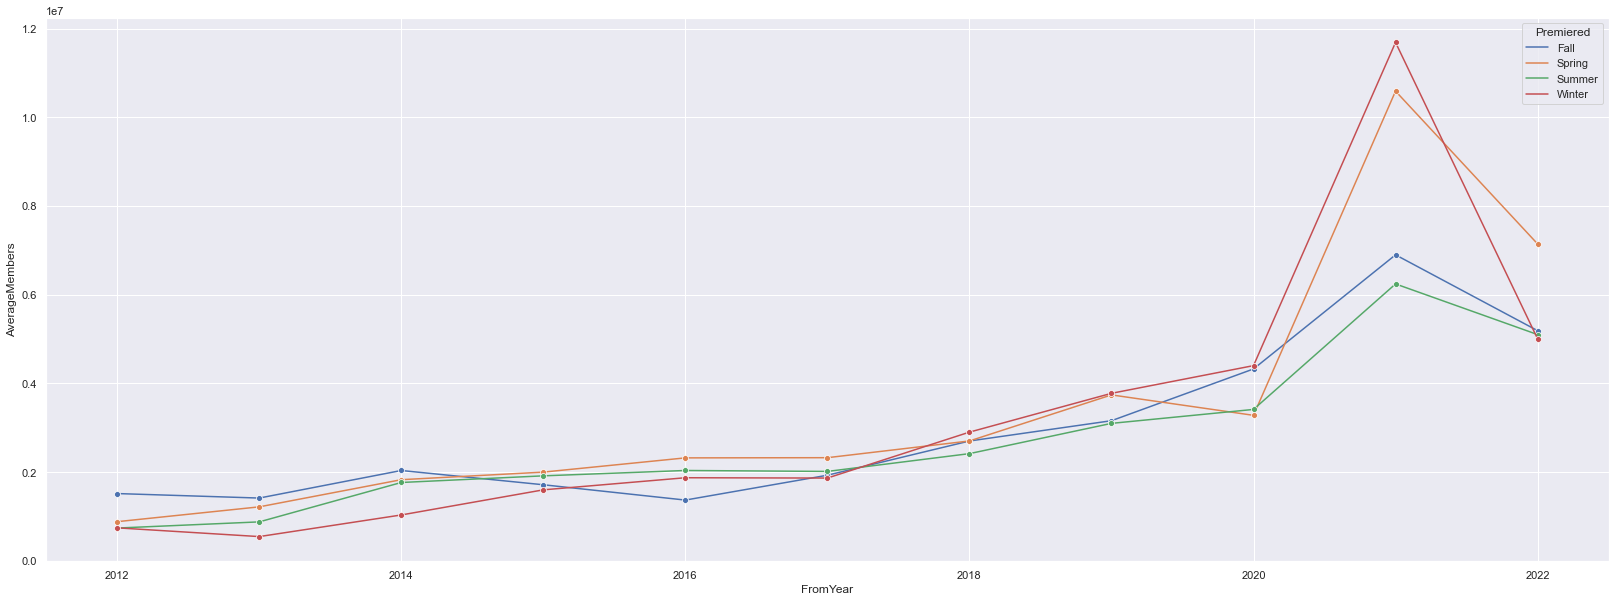

In [ ]:
fig,ax=plt.subplots(figsize=(28,10))
sns.lineplot(data = temp, x = temp.index.get_level_values('FromYear'),
             y = temp['AverageMembers'],
             hue = temp.index.get_level_values('Premiered'),
             marker = 'o')

**Nhận xét**\
Nhìn chung trung bình lượt xem qua các mùa là không quá cách biệt nhau và có thể thấy được là số lượng người xem qua từng năm có xu hướng tăng dần, đỉnh điểm là năm 2021, số lượng người xem tăng đột biến, đặc biệt là vào các mùa xuân và đông, điều này có thể là do đang trong đợt dịch covid nên số người ở nhà và xem anime ngày càng tăng, đặc biệt là 2 mùa xuân và đông là 2 mùa nghỉ lễ. 

### Câu hỏi 6: Thời điểm phát hành nội dung thích hợp trong năm?

In [ ]:
# Thoi diem phat hanh noi dung thich hop
df1 = df[['Name', 'From']].copy()
df1.dropna(inplace=True)
df1['Month'] = df1['From'].transform(lambda x: x.month_name())
df1['Year'] = df1['From'].transform(lambda x: x.year)
df1 = df1[df1['Year'] >= 2008]
# df1.sort_values(by=['Month'],inplace=True)
# df1['Month']=df1['From'].transform(lambda x: x.month_name())
df1 = df1.groupby(['Year', 'Month'])['Name'].count().unstack(level=0)
df1 = df1.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December'])
df1 = df1.fillna(0)
df1

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,
January,35,35,32,33,47,40,60,52,61,58,67,56,72,67,64
February,15,13,13,20,19,14,23,14,22,25,17,23,24,28,28
March,23,17,29,34,32,32,41,29,36,30,33,29,22,29,38
April,55,56,47,61,60,54,69,63,68,84,83,64,65,75,70
May,4,11,9,18,11,12,12,15,24,28,20,19,21,19,14
June,11,20,14,23,21,21,23,23,25,17,25,30,19,25,21
July,36,28,45,51,52,63,63,68,67,68,74,61,49,86,67
August,18,25,19,17,25,26,26,18,25,25,30,30,25,32,24
September,18,13,18,22,28,23,29,22,34,36,25,25,25,28,17


Text(138.453125, 0.5, 'Month')

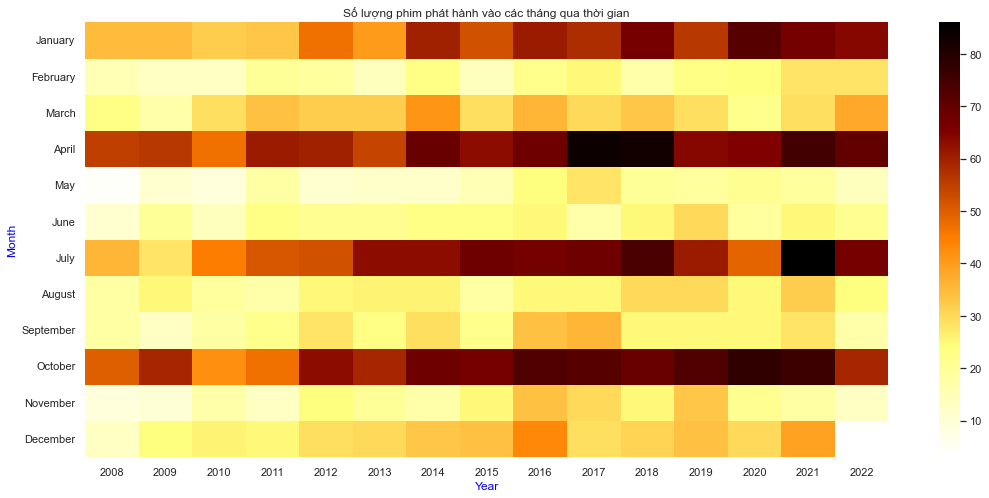

In [ ]:
plt.subplots(figsize=(18, 8))
sns.heatmap(data=df1,
            cmap='afmhot_r')
plt.title('Số lượng phim phát hành vào các tháng qua thời gian')
plt.xlabel('Year', color="blue")
plt.ylabel('Month', color="blue")

***Nhận xét***\
Nhìn vào Heat map hiển thị, thời điểm được các nhà phát hành phim yêu thích để tung ra những sản phẩn là tháng 1, tháng 4, tháng 7 và tháng 10. Đó là do đó là lúc phù hợp cho những dịp lễ hay kì nghỉ dài là lúc mà những tín đồ anime dành thời gian để "cày" những bộ phim mới phát hành.\
Ngoài ra nếu xét sâu hơn, các tháng này được phân bố đều trong năm để có thể giảm lượng cạnh tranh giữa các phim, không còn bị chỉ một thời điểm mà cho ra qua nhiều bộ được.\
Tuy nhiên nó cũng được phân bố ở các thời điểm nhát định để tăng độ nóng cho loạt những bộ phim ra mắt, vì nó được đưa ra vào một thời điểm mà không có những bộ phim làm sức nóng thì khó để tạo marketing hay độ khó nhằm nhân nhiệt cho phim

---

# THE END